# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfCounting16 = pd.read_csv("CleanData/counting-400runsClean-PC16.csv")
dfRead16 = pd.read_csv("CleanData/readCSVClean-PC16.csv")

dfCounting16.head()


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.893311,2.514954,0.166016,286.242,57.0,best,25000.0
1,2.569702,2.237183,0.142822,271.777,57.0,best,25000.0
2,3.000427,2.612549,0.178101,295.577,57.0,best,25000.0
3,2.849365,2.477051,0.157349,293.878,57.0,best,25000.0
4,2.866882,2.465088,0.181396,319.299,57.0,best,25000.0


In [36]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [37]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst"]#, "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10"]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfCountingMean16 = mean_of_dataset(dfCounting16)
dfCountingMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.79838,2.419124,0.161762,301.703423,57.884615,25000.0,best
1,3.521686,3.050279,0.213686,363.383846,59.384615,50000.0,best
2,4.090212,3.540295,0.24785,421.487,62.0,75000.0,best
3,4.955243,4.290031,0.291819,527.2017,62.1,100000.0,best
4,7.253441,6.242722,0.44652,783.141792,62.833333,200000.0,best


In [38]:
def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)
dfReadMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2767692266.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.149151,1.873956,0.12836,231.807079,53.973684,25000.0,random1
1,2.519434,2.185134,0.150334,264.781167,57.0,50000.0,random1
2,3.059938,2.668515,0.178193,304.554189,61.0,75000.0,random1
3,3.524851,3.07726,0.205626,343.570833,63.527778,100000.0,random1
4,4.166064,3.626851,0.233299,420.754475,65.425,200000.0,random1


In [39]:
# meanC6 = meanC6.reset_index(drop=True)
# meanC21 = meanC21.reset_index(drop=True)
# meanC23 = meanC23.reset_index(drop=True)
# meanR6 = meanR6.reset_index(drop=True)
# meanR21 = meanR21.reset_index(drop=True)
# meanR23 = meanR23.reset_index(drop=True)
meanC16 = dfCountingMean16.reset_index(drop=True)
meanR16 = dfReadMean16.reset_index(drop=True)
meanC16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.79838,2.419124,0.161762,301.703423,57.884615,25000.0,best
1,3.521686,3.050279,0.213686,363.383846,59.384615,50000.0,best
2,4.090212,3.540295,0.24785,421.487,62.0,75000.0,best
3,4.955243,4.290031,0.291819,527.2017,62.1,100000.0,best
4,7.253441,6.242722,0.44652,783.141792,62.833333,200000.0,best


In [40]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append((Cc-Rc)/400)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append((Ct-Rt)/400)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append((Cm-Rm)/400)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfCountingMean16, dfReadMean16)
dfCountingMean16


C:\Users\langk\AppData\Local\Temp\ipykernel_4464\1742114664.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\1742114664.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\1742114664.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_4464\1742114664.py:21: UserWarning: Boole

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV
0,2.79838,2.419124,0.161762,301.703423,57.884615,25000.0,best,0.002099,0.262636,0.000144
1,3.521686,3.050279,0.213686,363.383846,59.384615,50000.0,best,0.002623,0.327172,0.000211
2,4.090212,3.540295,0.24785,421.487,62.0,75000.0,best,0.002975,0.394528,0.000241
3,4.955243,4.290031,0.291819,527.2017,62.1,100000.0,best,0.004157,0.591168,0.000310
4,7.253441,6.242722,0.44652,783.141792,62.833333,200000.0,best,0.006852,1.005823,0.000560
5,9.02101,7.688056,0.613706,1005.174385,63.846154,300000.0,best,0.009730,1.480042,0.000930
6,10.757489,9.117086,0.776097,1227.873667,62.266667,400000.0,best,0.012556,1.952875,0.001288
7,12.222803,10.304769,1.007052,1406.599333,62.566667,500000.0,best,0.014956,2.318528,0.001825
8,13.41992,11.270937,1.215863,1547.355185,63.259259,600000.0,best,0.016706,2.578926,0.002300
9,14.986233,12.538122,1.444744,1744.374138,63.206897,700000.0,best,0.019352,2.998239,0.002836


# PLOTS

In [41]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [42]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]

In [43]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    for case in ["best", "worst"]:#, "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU - readCSV"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
calcPercent(dfCountingMean16)
dfCountingMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_4464\2661346545.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,2.79838,2.419124,0.161762,301.703423,57.884615,25000.0,best,0.002099,0.262636,0.000144,0.074993,100,0.002243
1,3.521686,3.050279,0.213686,363.383846,59.384615,50000.0,best,0.002623,0.327172,0.000211,0.074483,100,0.002834
2,4.090212,3.540295,0.24785,421.487,62.0,75000.0,best,0.002975,0.394528,0.000241,0.072740,100,0.003216
3,4.955243,4.290031,0.291819,527.2017,62.1,100000.0,best,0.004157,0.591168,0.000310,0.083900,100,0.004467
4,7.253441,6.242722,0.44652,783.141792,62.833333,200000.0,best,0.006852,1.005823,0.000560,0.094463,100,0.007412


In [44]:
dfCountingMean16[dfCountingMean16["Input case"] == "random1"]["full EC"].mean()

nan

In [45]:
print("counting worst power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"].mean() * 1000)+" W")
print("counting best power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"].mean() * 1000)+" W")

# for i in range(1,11):
#     print("counting random power estimate: "+str(dfCountingMean16[dfCountingMean16["Input case"] == "random"+str(i)]["full EC"].mean() / dfCountingMean16[dfCountingMean16["Input case"] == "random"+str(i)]["Time - readCSV"].mean() * 1000)+" W")

counting worst power estimate: 5.058609032197836 W
counting best power estimate: 7.410157459911231 W


In [46]:
dfCountingMean16[dfCountingMean16["Size"]==1000000]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
12,19.825267,16.485102,2.110598,2357.917083,63.791667,1000000.0,best,0.026733,4.131287,0.004373,0.134841,100,0.031106
25,493.328835,330.693321,111.256769,110962.5,53.0,1000000.0,worst,0.809611,275.318784,0.277135,0.164112,100,1.086746


In [47]:
dfCountingMean16[dfCountingMean16["Input case"]=="best"]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,2.79838,2.419124,0.161762,301.703423,57.884615,25000.0,best,0.002099,0.262636,0.000144,0.074993,100,0.002243
1,3.521686,3.050279,0.213686,363.383846,59.384615,50000.0,best,0.002623,0.327172,0.000211,0.074483,100,0.002834
2,4.090212,3.540295,0.24785,421.487,62.0,75000.0,best,0.002975,0.394528,0.000241,0.072740,100,0.003216
3,4.955243,4.290031,0.291819,527.2017,62.1,100000.0,best,0.004157,0.591168,0.000310,0.083900,100,0.004467
4,7.253441,6.242722,0.44652,783.141792,62.833333,200000.0,best,0.006852,1.005823,0.000560,0.094463,100,0.007412
5,9.02101,7.688056,0.613706,1005.174385,63.846154,300000.0,best,0.009730,1.480042,0.000930,0.107859,100,0.010660
6,10.757489,9.117086,0.776097,1227.873667,62.266667,400000.0,best,0.012556,1.952875,0.001288,0.116716,100,0.013844
7,12.222803,10.304769,1.007052,1406.599333,62.566667,500000.0,best,0.014956,2.318528,0.001825,0.122362,100,0.016781
8,13.41992,11.270937,1.215863,1547.355185,63.259259,600000.0,best,0.016706,2.578926,0.002300,0.124489,100,0.019007
9,14.986233,12.538122,1.444744,1744.374138,63.206897,700000.0,best,0.019352,2.998239,0.002836,0.129131,100,0.022188


In [48]:
dfCountingMean16[dfCountingMean16["Input case"] != "best"][dfCountingMean16["full EC"] > 3]

C:\Users\langk\AppData\Local\Temp\ipykernel_4464\1838103692.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCountingMean16[dfCountingMean16["Input case"] != "best"][dfCountingMean16["full EC"] > 3]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC


worst R2  0.998864977517756 

best R2  0.9969991631924618 



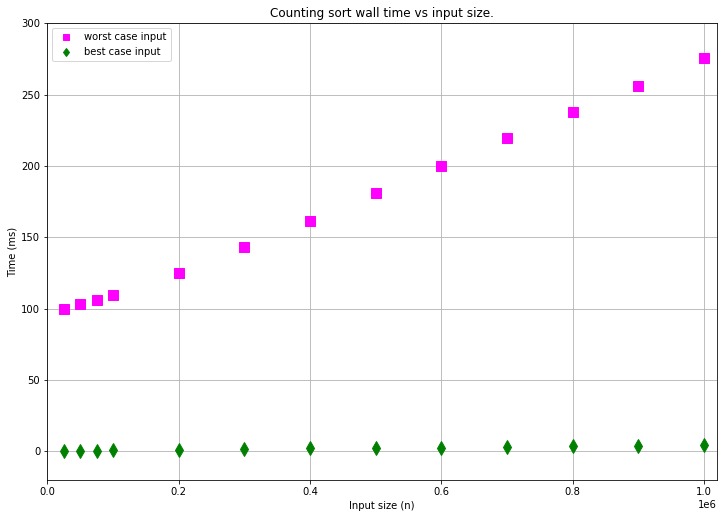

In [62]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(-10000,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-10000,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort wall time vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.xlim(0, 1020000)
plt.ylim(-20, 300)
plt.grid()
plt.legend()
plt.show()


# SQ 2: Time vs bigO


worst R2  0.998864977517756 

Worst gradient:  [ 95.91889556 100.47294871 105.02700186 109.58105502 127.79726763
 146.01348024 164.22969286 182.44590547 200.66211809 218.8783307
 237.09454331 255.31075593 273.52696854] 

best R2  0.9969991631924618 

Best gradient:  [0.29578232 0.39610175 0.49642118 0.5967406  0.99801832 1.39929603
 1.80057374 2.20185146 2.60312917 3.00440688 3.4056846  3.80696231
 4.20824002] 



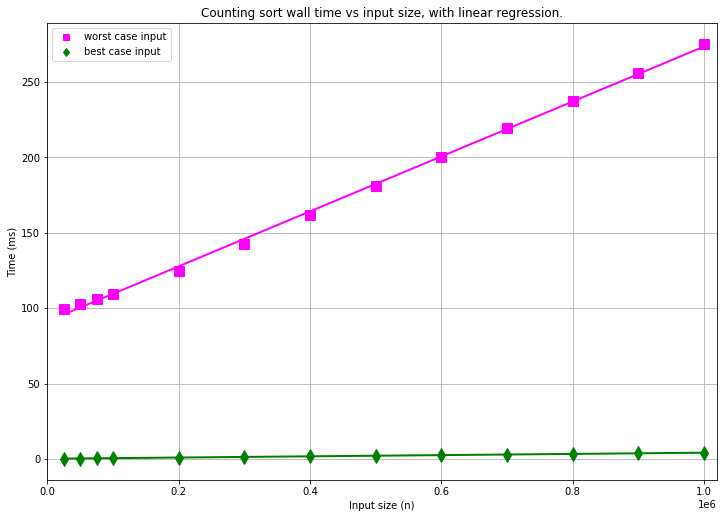

In [77]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-1000000,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-1000000,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"Worst gradient: ", worst[2], "\n")
print(f"best R2 ", best[1], "\n")
print(f"Best gradient: ", best[2], "\n")
plt.title("Counting sort wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.xlim(-10, 1020000)
plt.grid()
plt.legend()
plt.show()


best R2  0.9969991631924618 



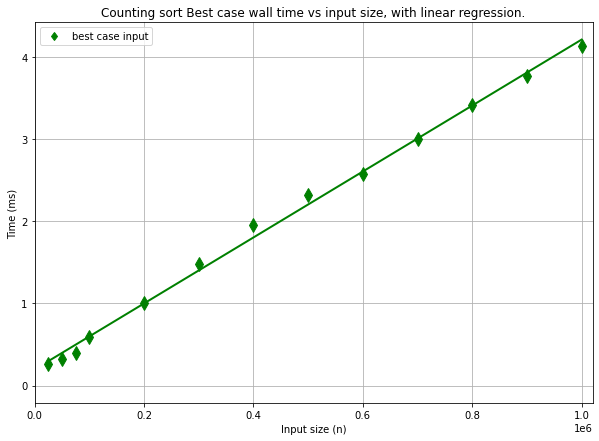

In [107]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
# # for i in range(len(Rs)):
# #     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# plt.plot(-100000,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-1000000,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort Best case wall time vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid()
plt.xlim(0,1020000)
# plt.ylim(-.001,.035)
plt.show()


# EC vs Time

worst R2  0.9957884707865025 

best R2  0.9989950938306992 



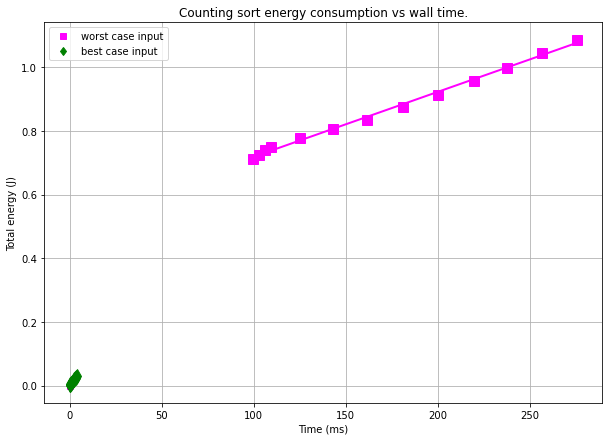

In [79]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=True)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
plt.plot(0,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.show()


worst R2  0.9957884707865025 



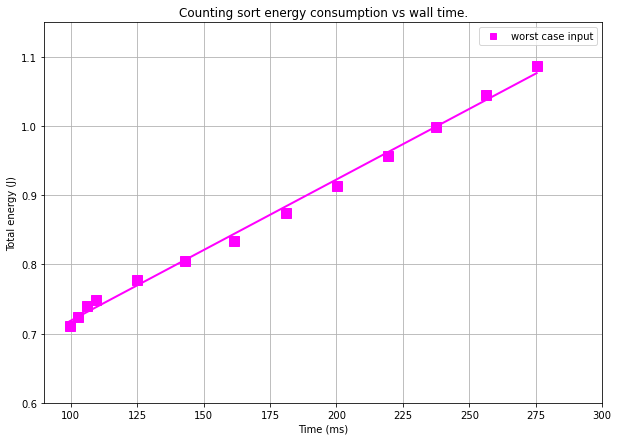

In [80]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(0,0,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=True)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
#plt.plot(0,0,"d", color="green",label="best case input")
# print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.xlim(90,300)
plt.ylim(0.6,1.15)
plt.grid()
plt.show()


best R2  0.9989950938306992 



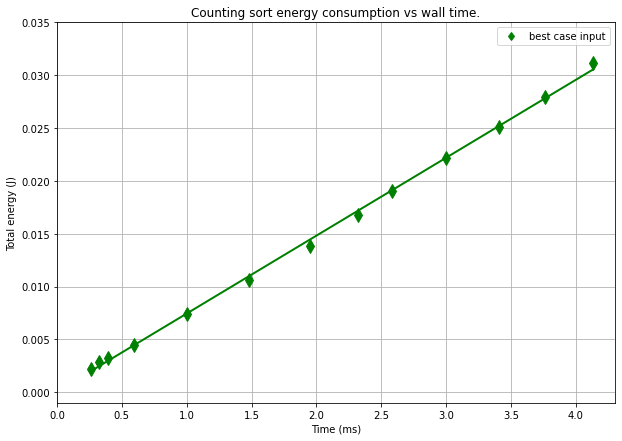

In [88]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(-1000000,0,"v", color="darkorange",label="random1 - random10")
# # for i in range(len(Rs)):
# #     print(f"random{i} R2", Rs[i][1], " \n")
# worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
# plt.plot(-100000,0,"s", color="fuchsia",label="worst case input")
# print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Time - readCSV"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=True)
plt.plot(-1000000,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs wall time.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.legend()
plt.grid()
plt.xlim(0,4.3)
plt.ylim(-.001,.035)
plt.show()


# EC vs big-oh

worst R2  0.9940778482955628 

best R2  0.9992365673253704 



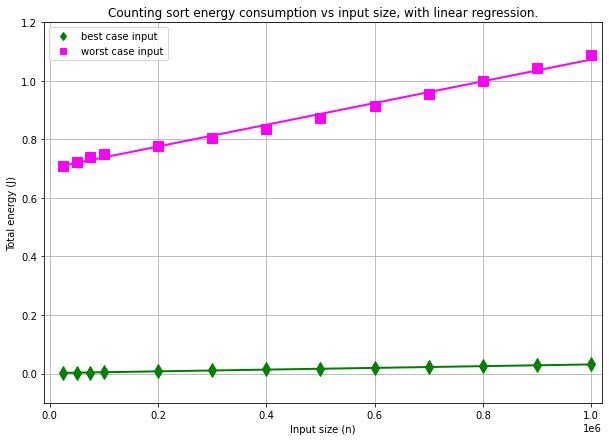

In [90]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-10000,-10000,"d", color="green",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size, with linear regression.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1020000)
plt.ylim(-.1,1.2)

plt.legend()
plt.show()

worst R2  0.9940778482955628 

best R2  0.9992365673253704 



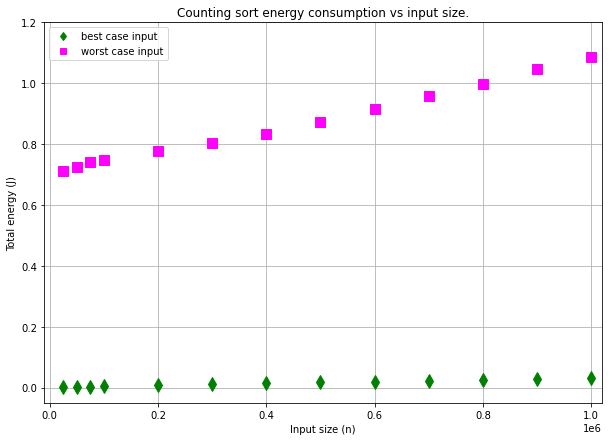

In [92]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,-10000,"d", color="green",label="best case input")
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-10000,1020000)
plt.ylim(-.05,1.2)
plt.legend()
plt.show()

worst R2  0.9940778482955628 

best R2  0.9992365673253704 



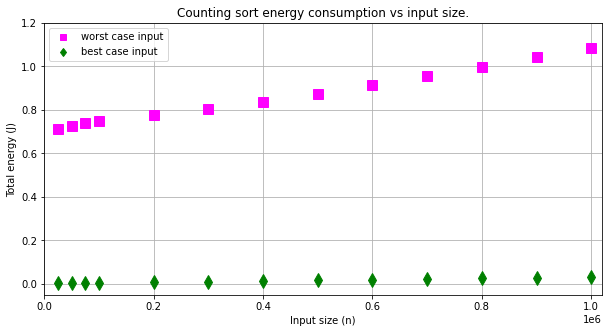

In [99]:
plt.figure(figsize=(10,5))
color = "red"
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
# plt.plot(-10000,-10000,"v", color="darkorange",label="countingrandom1 - countingrandom10")
plt.plot(-10000,-10000,"d", color="green",label="best case input")

Rs = []

best = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "best"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
# for i in range(1,11):
#     Rs.append(polyReg(dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["Size"], dfCountingMean16[dfCountingMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort energy consumption vs input size.")
plt.xlabel("Input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(0,1020000)
plt.ylim(-.05,1.2)

plt.legend()
plt.show()